<a href="https://colab.research.google.com/github/SebastianSanchez22/ML_DL-Classifier/blob/main/Trabajo_ML_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo Práctico 3


## Importando el dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/smoke_detection_iot.csv')

In [6]:
data.keys()

Index(['Unnamed: 0', 'UTC', 'Temperature[C]', 'Humidity[%]', 'TVOC[ppb]',
       'eCO2[ppm]', 'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5',
       'NC0.5', 'NC1.0', 'NC2.5', 'CNT', 'Fire Alarm'],
      dtype='object')

In [7]:
data.shape

(62630, 16)

In [8]:
data

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,62625,1655130047,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,0
62626,62626,1655130048,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,0
62627,62627,1655130049,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,0
62628,62628,1655130050,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,0


## Limpieza de datos

Chequeando si existen datos nulos:

In [9]:
data.isnull().sum()

Unnamed: 0        0
UTC               0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Fire Alarm        0
dtype: int64

Las columnas "Unnamed: 0", "UTC", "CNT" deben ser eliminadas ya que no proveen información útil para el trabajo.

In [10]:
unuseful_features = ['Unnamed: 0', 'UTC','CNT']
for feature in unuseful_features:
  data = data.drop(feature, axis=1)

data.head()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
0,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0
1,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,0
2,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,0
3,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,0
4,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,0


## Análisis de los datos

In [11]:
data.describe()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
count,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000
mean,15.970424,48.539499,1942.057528,670.021044,12942.453936,19754.257912,938.627649,100.594309,184.467770,491.463608,203.586487,80.049042,0.714626
std,14.359576,8.865367,7811.589055,1905.885439,272.464305,609.513156,1.331344,922.524245,1976.305615,4265.661251,2214.738556,1083.383189,0.451596
min,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.994250,47.530000,130.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.340000,8.820000,1.384000,0.033000,0.000000
50%,20.130000,50.150000,981.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,1.943000,0.044000,1.000000
75%,25.409500,53.240000,1189.000000,438.000000,13109.000000,20078.000000,939.418000,2.090000,2.180000,14.420000,2.249000,0.051000,1.000000
max,59.930000,75.200000,60000.000000,60000.000000,13803.000000,21410.000000,939.861000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,1.000000


Rango para cada una de las variables

In [12]:
for key in data.keys():
  print(f"Min and max for {key}: {data[key].min()} , {data[key].max()}")

Min and max for Temperature[C]: -22.01 , 59.93
Min and max for Humidity[%]: 10.74 , 75.2
Min and max for TVOC[ppb]: 0 , 60000
Min and max for eCO2[ppm]: 400 , 60000
Min and max for Raw H2: 10668 , 13803
Min and max for Raw Ethanol: 15317 , 21410
Min and max for Pressure[hPa]: 930.852 , 939.861
Min and max for PM1.0: 0.0 , 14333.69
Min and max for PM2.5: 0.0 , 45432.26
Min and max for NC0.5: 0.0 , 61482.03
Min and max for NC1.0: 0.0 , 51914.68
Min and max for NC2.5: 0.0 , 30026.438
Min and max for Fire Alarm: 0 , 1


Valor más común de las variables (Moda)

In [13]:
for key in data.keys():
  print(f"Most common value for {key}: {data[key].value_counts().idxmax()}")

Most common value for Temperature[C]: 24.48
Most common value for Humidity[%]: 47.5
Most common value for TVOC[ppb]: 0
Most common value for eCO2[ppm]: 400
Most common value for Raw H2: 12969
Most common value for Raw Ethanol: 19438
Most common value for Pressure[hPa]: 938.709
Most common value for PM1.0: 1.79
Most common value for PM2.5: 1.86
Most common value for NC0.5: 0.0
Most common value for NC1.0: 1.976
Most common value for NC2.5: 0.043
Most common value for Fire Alarm: 1


Ejemplo de gráficas de: temperatura, presión y Etanol

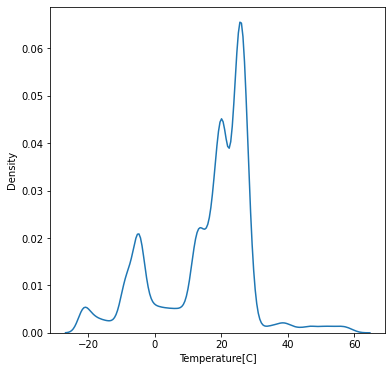

In [14]:
plt.figure(figsize = (6,6))
sns.kdeplot(data = data,x = 'Temperature[C]')

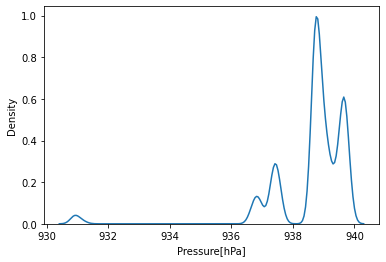

In [15]:
sns.kdeplot(data = data,x = 'Pressure[hPa]')

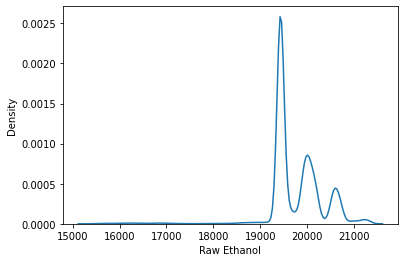

In [16]:
sns.kdeplot(data = data,x = 'Raw Ethanol')

Análisis para la variable de salida

In [17]:
data['Fire Alarm'].value_counts()

1    44757
0    17873
Name: Fire Alarm, dtype: int64

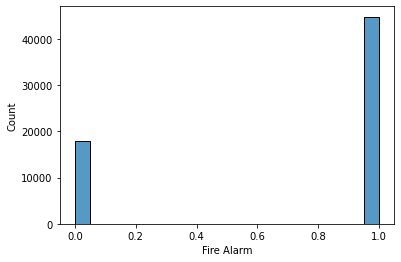

In [18]:
sns.histplot(data['Fire Alarm'])

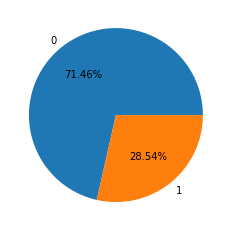

In [19]:
plt.pie(data['Fire Alarm'].value_counts(), 
        labels = data['Fire Alarm'].unique(), autopct='%.2f%%');

Análisis de correlación

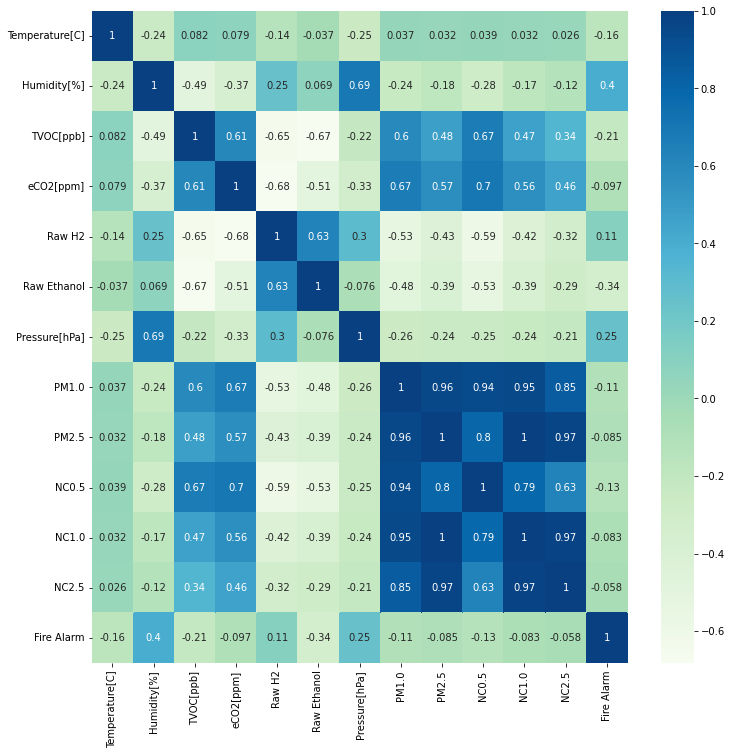

In [20]:
plt.figure(figsize = (12,12))
sns.heatmap(data.corr(),annot = True,cmap = 'GnBu')

## División de los datos en entrenamiento, prueba y validación

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [22]:
dataset = data.values
X = dataset[:,0:-1].astype(float)
Y = dataset[:,-1]

Se deja un 15% para datos de prueba

In [23]:
X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size=0.15, random_state=5, stratify=Y)

In [24]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [25]:
X[0:5]

array([[   20.   ,    57.36 ,     0.   ,   400.   , 12306.   , 18520.   ,
          939.735,     0.   ,     0.   ,     0.   ,     0.   ,     0.   ],
       [   20.015,    56.67 ,     0.   ,   400.   , 12345.   , 18651.   ,
          939.744,     0.   ,     0.   ,     0.   ,     0.   ,     0.   ],
       [   20.029,    55.96 ,     0.   ,   400.   , 12374.   , 18764.   ,
          939.738,     0.   ,     0.   ,     0.   ,     0.   ,     0.   ],
       [   20.044,    55.28 ,     0.   ,   400.   , 12390.   , 18849.   ,
          939.736,     0.   ,     0.   ,     0.   ,     0.   ,     0.   ],
       [   20.059,    54.69 ,     0.   ,   400.   , 12403.   , 18921.   ,
          939.744,     0.   ,     0.   ,     0.   ,     0.   ,     0.   ]])

In [26]:
X_train[0:5]

array([[ 0.7331816 ,  0.10255369, -0.07881888, -0.14269527,  0.14497478,
        -0.56867587,  0.08272933, -0.10753156, -0.09270982, -0.11289374,
        -0.09136876, -0.07434229],
       [ 0.69063169, -0.13288931, -0.08638551, -0.13266846, -0.10085973,
        -0.55719702,  0.04540057, -0.10770317, -0.0927893 , -0.11314387,
        -0.09144319, -0.07434589],
       [ 0.7383434 ,  0.70636922, -0.24926039, -0.14269527,  0.55225285,
         0.38242947,  0.82258522, -0.10880787, -0.09332084, -0.11480601,
        -0.09193455, -0.07436843],
       [ 0.27350301,  0.02595022, -0.24605419, -0.14269527,  0.94118505,
         0.62348548,  0.73224964, -0.1082287 , -0.09304265, -0.11393169,
        -0.0916758 , -0.07435671],
       [ 0.75829303, -0.05966541, -0.07958837, -0.14058437,  0.09727554,
        -0.57851489,  0.09915398, -0.10717763, -0.09253595, -0.11235372,
        -0.09120925, -0.07433508]])

## KNN (K-Nearest Neighbors)

In [27]:
from sklearn.neighbors import KNeighborsClassifier

### Buscando el mejor parámetro para el número del vecinos

In [28]:
from sklearn.model_selection import GridSearchCV

In [44]:
neighbors_grid = {'n_neighbors':np.arange(2,10)}

In [45]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,neighbors_grid,cv=5)
knn_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [46]:
print(knn_cv.best_score_,knn_cv.best_params_)

0.9987602141448295 {'n_neighbors': 2}


Comprobando el resultado del GridSearch manualmente

In [47]:
neighbors = np.arange(2,10)

train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test) 

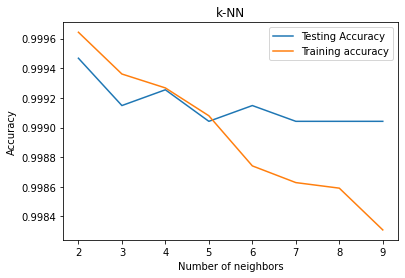

In [48]:
plt.title('k-NN')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

### Validación cruzada con los parámetros escogidos

In [49]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

In [50]:
scoring = ['precision_macro', 'recall_macro','f1_macro']
knn = KNeighborsClassifier(n_neighbors=2, metric='euclidean')
accuracy = cross_val_score(knn, X_train, y_train, cv=10)
scores = cross_validate(knn, X_train,y_train, scoring=scoring, cv=10)

In [51]:
accuracy

array([0.99849737, 0.99887303, 0.99924869, 0.99830954, 0.9986852 ,
       0.99924854, 0.99887282, 0.99830922, 0.99943641, 0.99962427])

In [52]:
accuracy.mean()

0.9989105088516965

In [53]:
for score in scores:
  print(f"{score} mean: {scores[score].mean()}")

fit_time mean: 0.11073873043060303
score_time mean: 0.3943476676940918
test_precision_macro mean: 0.9985666154808331
test_recall_macro mean: 0.9987632878051651
test_f1_macro mean: 0.9986646510077672


### Análisis de resultados con los parámetros escogidos

In [54]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [55]:
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

Predicted,0.0,1.0,All
True,,,
0.0,2679,2,2681
1.0,3,6711,6714
All,2682,6713,9395


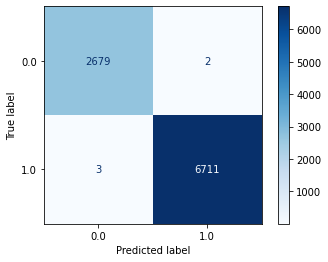

In [56]:
cm=confusion_matrix(y_test,y_pred)
classes = np.unique(Y)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

In [57]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2681
         1.0       1.00      1.00      1.00      6714

    accuracy                           1.00      9395
   macro avg       1.00      1.00      1.00      9395
weighted avg       1.00      1.00      1.00      9395



## Naive Bayes

In [58]:
from sklearn.naive_bayes import GaussianNB 

### Validación cruzada

In [59]:
scoring = ['precision_macro', 'recall_macro','f1_macro']
bn = GaussianNB()
accuracy = cross_val_score(bn, X_train, y_train, cv=10)
scores = cross_validate(bn, X_train, y_train, scoring=scoring, cv=10)

In [60]:
accuracy

array([0.77216379, 0.7663411 , 0.76521412, 0.75882795, 0.76202104,
       0.76122487, 0.76855157, 0.7689273 , 0.76817584, 0.76009769])

In [61]:
accuracy.mean()

0.7651545262447119

In [62]:
for score in scores:
  print(f"{score} mean: {scores[score].mean()}")

fit_time mean: 0.02103426456451416
score_time mean: 0.013588953018188476
test_precision_macro mean: 0.7789822673017823
test_recall_macro mean: 0.6069586219073717
test_f1_macro mean: 0.6113219334957035


### Análisis de resultados

In [63]:
bn.fit(X_train,y_train)

GaussianNB()

In [64]:
y_predict=bn.predict(X_test)

In [65]:
cm=confusion_matrix(y_test,y_predict)

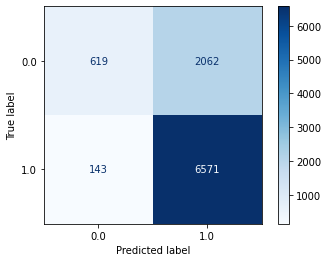

In [66]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)

In [67]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       0.81      0.23      0.36      2681
         1.0       0.76      0.98      0.86      6714

    accuracy                           0.77      9395
   macro avg       0.79      0.60      0.61      9395
weighted avg       0.78      0.77      0.71      9395



## Support Vector Machine

In [68]:
from sklearn.svm import SVC

### Buscando el mejor parámetro para el kernel

In [69]:
kernels_grid = {'kernel':['linear','poly','rbf']}
svm=SVC()
svm_cv= GridSearchCV(svm,kernels_grid,cv=5)
svm_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'kernel': ['linear', 'poly', 'rbf']})

In [70]:
print(svm_cv.best_score_,svm_cv.best_params_)

0.9662627970320278 {'kernel': 'rbf'}


### Haciendo validación cruzada con los parámetros escogidos

In [71]:
scoring = ['precision_macro', 'recall_macro','f1_macro']
svm=SVC(kernel='rbf')
accuracy = cross_val_score(svm, X_train, y_train, cv=3)
scores = cross_validate(svm, X_train,y_train, scoring=scoring, cv=3)

In [72]:
accuracy

array([0.965286  , 0.96534235, 0.96398986])

In [73]:
accuracy.mean()

0.9648727341035034

In [74]:
for score in scores:
  print(f"{score} mean: {scores[score].mean()}")

fit_time mean: 12.731649398803711
score_time mean: 5.75172742207845
test_precision_macro mean: 0.9690234799159003
test_recall_macro mean: 0.9446421581689864
test_f1_macro mean: 0.9558242258302004


### Análisis de resultados con los parámetros escogidos

Predicted,0.0,1.0,All
True,,,
0.0,2427,254,2681
1.0,52,6662,6714
All,2479,6916,9395


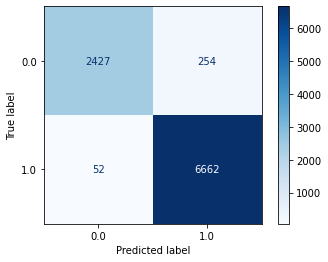

In [75]:
svm.fit(X_train,y_train)
y_pred_svm=svm.predict(X_test)
cm=confusion_matrix(y_test,y_pred_svm)
classes = np.unique(Y)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
pd.crosstab(y_test, y_pred_svm, rownames=['True'], colnames=['Predicted'], margins=True)

In [76]:
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

         0.0       0.98      0.91      0.94      2681
         1.0       0.96      0.99      0.98      6714

    accuracy                           0.97      9395
   macro avg       0.97      0.95      0.96      9395
weighted avg       0.97      0.97      0.97      9395



## Decision Tree

In [77]:
from sklearn import tree

### Con criterion="Gini"

In [78]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

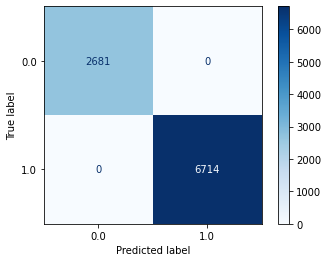

In [79]:
prediction=clf.predict(X_test)
cm=confusion_matrix(y_test,prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)

In [80]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2681
         1.0       1.00      1.00      1.00      6714

    accuracy                           1.00      9395
   macro avg       1.00      1.00      1.00      9395
weighted avg       1.00      1.00      1.00      9395



In [81]:
scoring = ['precision_macro', 'recall_macro','f1_macro']
clf = tree.DecisionTreeClassifier()
accuracy = cross_val_score(clf, X_train, y_train, cv=10)
scores = cross_validate(clf, X_train,y_train, scoring=scoring, cv=10)

In [82]:
accuracy

array([0.99962434, 0.99981217, 0.99981217, 1.        , 0.99981217,
       0.99981214, 1.        , 1.        , 0.99981214, 0.99981214])

In [83]:
accuracy.mean()

0.9998497264539452

In [84]:
for score in scores:
  print(f"{score} mean: {scores[score].mean()}")

fit_time mean: 0.23521714210510253
score_time mean: 0.010986661911010743
test_precision_macro mean: 0.9997829491476015
test_recall_macro mean: 0.9998026392460584
test_f1_macro mean: 0.9997927502525339


### Con criterion="Entropy"

In [85]:
clf2 = tree.DecisionTreeClassifier(criterion='entropy')
clf2.fit(X_train,y_train)
prediction2 = clf2.predict(X_test)

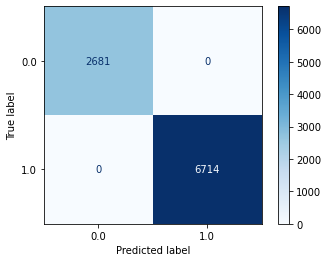

In [86]:
cm=confusion_matrix(y_test,prediction2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)

In [87]:
print(classification_report(y_test,prediction2))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2681
         1.0       1.00      1.00      1.00      6714

    accuracy                           1.00      9395
   macro avg       1.00      1.00      1.00      9395
weighted avg       1.00      1.00      1.00      9395



In [88]:
scoring = ['precision_macro', 'recall_macro','f1_macro']
clf2 = tree.DecisionTreeClassifier(criterion='entropy')
accuracy2 = cross_val_score(clf2, X_train, y_train, cv=10)
scores2 = cross_validate(clf2, X_train,y_train, scoring=scoring, cv=10)

In [89]:
accuracy2

array([0.99962434, 1.        , 0.99981217, 0.99962434, 1.        ,
       0.99943641, 0.99981214, 1.        , 0.99962427, 0.99962427])

In [90]:
accuracy2.mean()

0.9997557944607083

In [91]:
criterios = ['entropy', 'gini']

train_accuracy =np.empty(len(criterios))
test_accuracy = np.empty(len(criterios))

for i,criterio in enumerate(criterios):
    clf = tree.DecisionTreeClassifier(criterion= criterio)
    clf.fit(X_train, y_train)
    train_accuracy[i] = clf.score(X_train, y_train)
    test_accuracy[i] = clf.score(X_test, y_test)

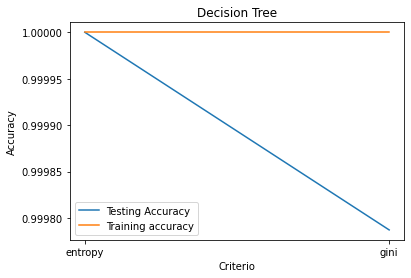

In [92]:
plt.title('Decision Tree')
plt.plot(criterios, test_accuracy, label='Testing Accuracy')
plt.plot(criterios, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Criterio')
plt.ylabel('Accuracy')
plt.show()

## Neural Network: Multi-Layer Perceptron

### Escogiendo el parámetro del número de capas ocultas en la red

In [93]:
from sklearn.neural_network import MLPClassifier

Se hace el rango de 2 a 4 ya que el tiempo de entrenamiento es demasiado largo (Se hicieron pruebas con más capas pero el mejor sigue siendo 4)

In [94]:
param_grid = {'hidden_layer_sizes':np.arange(2,5)}
mlp = MLPClassifier(solver='adam',alpha=1e-5,random_state=1, max_iter=600)
mlp_cv= GridSearchCV(mlp,param_grid,cv=3,n_jobs=-1,verbose=10)
mlp_cv.fit(X_train,y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


GridSearchCV(cv=3,
             estimator=MLPClassifier(alpha=1e-05, max_iter=600, random_state=1),
             n_jobs=-1, param_grid={'hidden_layer_sizes': array([2, 3, 4])},
             verbose=10)

In [95]:
print(mlp_cv.best_score_,mlp_cv.best_params_)

0.9986287217056447 {'hidden_layer_sizes': 4}


### Haciendo validación cruzada con el parámetro escogido

In [96]:
scoring = ['precision_macro', 'recall_macro','f1_macro']
mlp = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes = 4, random_state=1, max_iter=600)
accuracy = cross_val_score(mlp, X_train, y_train, cv=3)
scores = cross_validate(mlp, X_train, y_train, scoring=scoring, cv=3)

In [97]:
accuracy

array([0.99864751, 0.99847844, 0.99876021])

In [98]:
accuracy.mean()

0.9986287217056447

In [99]:
for score in scores:
  print(f"{score} mean: {scores[score].mean()}")

fit_time mean: 46.49333922068278
score_time mean: 0.049516757329305015
test_precision_macro mean: 0.9989428843507615
test_recall_macro mean: 0.997696264877621
test_f1_macro mean: 0.998316840480095


### Análisis de resultados con los parámetros escogidos

In [100]:
mlp.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=4, max_iter=600, random_state=1)

Predicted,0.0,1.0,All
True,,,
0.0,2674,7,2681
1.0,1,6713,6714
All,2675,6720,9395


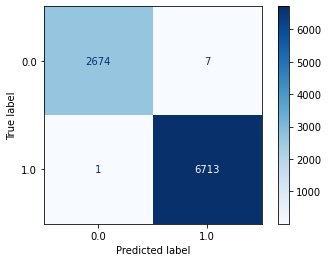

In [101]:
y_pred = mlp.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
classes = np.unique(Y)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

In [102]:
print(f'acurracy: {(2674+6713)/9395}')

acurracy: 0.9991484832357637


In [103]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2681
         1.0       1.00      1.00      1.00      6714

    accuracy                           1.00      9395
   macro avg       1.00      1.00      1.00      9395
weighted avg       1.00      1.00      1.00      9395



## Comparación de todos los métodos con validación cruzada estratificada

In [104]:
list_Classifiers=[
  KNeighborsClassifier(n_neighbors=2, metric='euclidean'),
  GaussianNB(),
  SVC(kernel='rbf'),
  tree.DecisionTreeClassifier(criterion='entropy'),
  MLPClassifier(solver='adam', hidden_layer_sizes=4, alpha=1e-5,random_state=1, max_iter=600)
]

In [105]:
X_copy = X.copy()
Y_copy = Y.copy()
X_copy = ss.fit_transform(X_copy)

In [106]:
from sklearn.base import clone
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, precision_score, recall_score
from statistics import mean, stdev
import itertools

def cvClassifiers(X,Y, list_Classifiers):
  skf = StratifiedKFold(n_splits=10)
  scores = [[] for c in list_Classifiers]
  predicted_y=[[] for c in list_Classifiers]
  real_y=[[] for c in list_Classifiers]
  for train_index, test_index in skf.split(X_copy, Y_copy):
    for i,c in enumerate(list_Classifiers):    
      model = clone(c)
      X_train_cv, X_test_cv = X_copy[train_index], X_copy[test_index]
      y_train_cv, y_test_cv = Y_copy[train_index], Y_copy[test_index]
      model.fit(X_train_cv, y_train_cv)
      scores[i].append(model.score(X_test_cv,y_test_cv))
      py=model.predict(X_test_cv)
      predicted_y[i]=list(itertools.chain(predicted_y[i],py.flatten().tolist()))
      real_y[i]=list(itertools.chain(real_y[i],y_test_cv.flatten().tolist()))
  accuracy=[mean(sc) for sc in scores]
  cm=[confusion_matrix(real_y[i],predicted_y[i]) for i in range(0,len(list_Classifiers))]
  f1=[f1_score(real_y[i],predicted_y[i]) for i in range(0,len(list_Classifiers))]
  precision=[precision_score(real_y[i],predicted_y[i]) for i in range(0,len(list_Classifiers))]
  recall=[recall_score(real_y[i],predicted_y[i]) for i in range(0,len(list_Classifiers))]
  return accuracy, f1, precision, recall, cm

In [108]:
acc, f1, precision, recall, c =cvClassifiers(X_train, y_train,list_Classifiers)

In [109]:
clfrs = ['K-NN','Naive Bayes', 'Support Vector Machine', 'Decision Tree', 'Multi-Layer Perceptron']

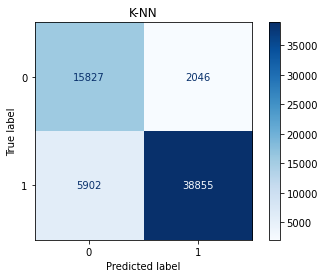

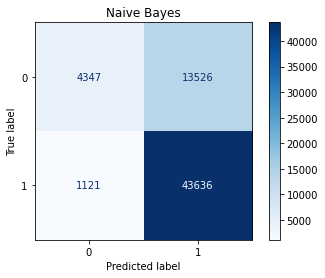

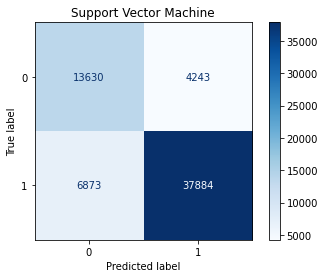

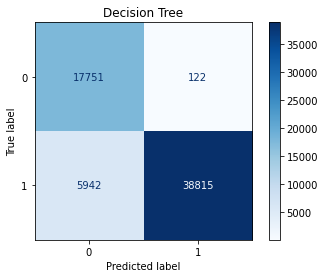

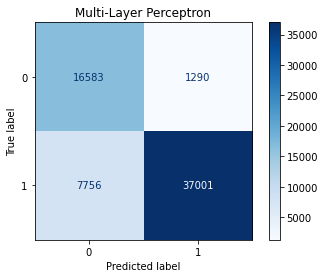

In [111]:
for i in range(0,len(c)):
  disp = ConfusionMatrixDisplay(confusion_matrix=c[i])
  disp.plot(cmap=plt.cm.Blues)
  disp.ax_.set_title(clfrs[i])

In [120]:
stats = {'Model': clfrs, 'Accuracy': acc, 'F1':f1, 'precision':precision, 'recall':recall}

In [121]:
statsDataFrame = pd.DataFrame(data = stats)

In [122]:
statsDataFrame

,Model,Accuracy,F1,precision,recall
0,K-NN,0.873096,0.907212,0.949977,0.868132
1,Naive Bayes,0.766134,0.856288,0.763374,0.974954
2,Support Vector Machine,0.822513,0.872059,0.899281,0.846437
3,Decision Tree,0.903177,0.927546,0.996867,0.867239
4,Multi-Layer Perceptron,0.855564,0.891075,0.966311,0.826709
